<a href="https://colab.research.google.com/github/FredLongo/Deep_Learning_Book_exercises/blob/main/chapter04_Newswire_Multiclass_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Getting started with neural networks: Classification and regression

## Classifying newswires: A multiclass classification example from 4.2

### The Reuters dataset

**Loading the Reuters dataset**

In [9]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

In [10]:
len(train_data)

8982

In [11]:
len(test_data)

2246

In [12]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

**Decoding newswires back to text**

In [13]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

In [14]:
train_labels[10]

3

In [7]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

### Preparing the data

**Encoding the input data**

In [16]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**Encoding the labels**

In [17]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [19]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
# same as above only thisn is built in keras utility
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### Building your model

**Model definition**

In [28]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

**Compiling the model**

In [29]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [30]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Training the model**

In [31]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 76ms/step - loss: 2.9160 - accuracy: 0.4691 - val_loss: 2.0273 - val_accuracy: 0.5900
Epoch 2/20
16/16 [==============================] - 1s 82ms/step - loss: 1.6464 - accuracy: 0.6724 - val_loss: 1.4404 - val_accuracy: 0.6810
Epoch 3/20
16/16 [==============================] - 2s 95ms/step - loss: 1.2202 - accuracy: 0.7349 - val_loss: 1.2210 - val_accuracy: 0.7340
Epoch 4/20
16/16 [==============================] - 1s 61ms/step - loss: 0.9964 - accuracy: 0.7836 - val_loss: 1.1040 - val_accuracy: 0.7450
Epoch 5/20
16/16 [==============================] - 1s 55ms/step - loss: 0.8312 - accuracy: 0.8185 - val_loss: 1.0263 - val_accuracy: 0.7720
Epoch 6/20
16/16 [==============================] - 1s 56ms/step - loss: 0.7012 - accuracy: 0.8479 - val_loss: 0.9722 - val_accuracy: 0.8000
Epoch 7/20
16/16 [==============================] - 1s 51ms/step - loss: 0.5883 - accuracy: 0.8722 - val_loss: 0.9518 - val_accuracy: 0.8010
Epoch 8/20
16

**Plotting the training and validation loss**

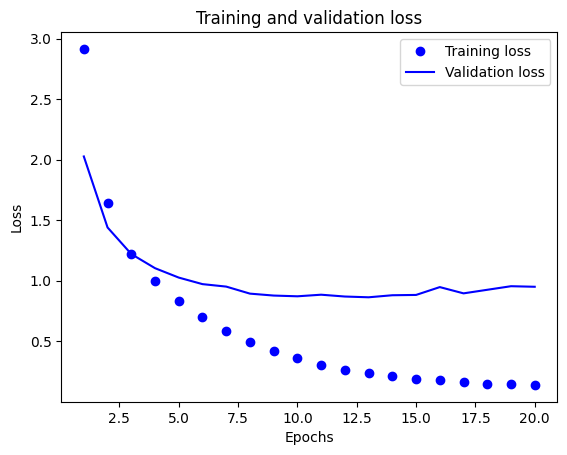

In [33]:
import matplotlib.pyplot as plt
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

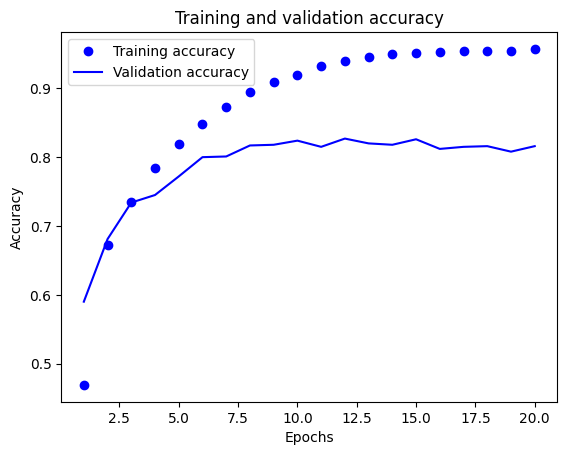

In [34]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [35]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 46ms/step - loss: 2.5719 - accuracy: 0.5102
Epoch 2/9
18/18 [==============================] - 2s 89ms/step - loss: 1.4719 - accuracy: 0.6840
Epoch 3/9
18/18 [==============================] - 2s 136ms/step - loss: 1.1250 - accuracy: 0.7544
Epoch 4/9
18/18 [==============================] - 2s 90ms/step - loss: 0.9070 - accuracy: 0.8084
Epoch 5/9
18/18 [==============================] - 2s 113ms/step - loss: 0.7461 - accuracy: 0.8395
Epoch 6/9
18/18 [==============================] - 2s 87ms/step - loss: 0.6136 - accuracy: 0.8692
Epoch 7/9
18/18 [==============================] - 2s 94ms/step - loss: 0.5111 - accuracy: 0.8903
Epoch 8/9
18/18 [==============================] - 1s 47ms/step - loss: 0.4300 - accuracy: 0.9103
Epoch 9/9
71/71 [==============================] - 0s 4ms/step - loss: 0.9031 - accuracy: 0.7974


In [36]:
results

[0.9031162261962891, 0.7974176406860352]

In [37]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.1798753339269813

### Generating predictions on new data

In [38]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 4ms/step


In [39]:
predictions[0].shape

(46,)

In [40]:
np.sum(predictions[0])

1.0000001

In [41]:
np.argmax(predictions[0])

3

### A different way to handle the labels and the loss

In [42]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [43]:
y_train

array([ 3,  4,  3, ..., 25,  3, 25])

In [44]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

### The importance of having sufficiently large intermediate layers

**A model with an information bottleneck**

In [45]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 3s 28ms/step - loss: 2.7089 - accuracy: 0.4183 - val_loss: 1.9929 - val_accuracy: 0.5740
Epoch 2/20
63/63 [==============================] - 1s 18ms/step - loss: 1.7324 - accuracy: 0.6125 - val_loss: 1.6045 - val_accuracy: 0.6280
Epoch 3/20
63/63 [==============================] - 1s 18ms/step - loss: 1.4091 - accuracy: 0.6616 - val_loss: 1.4290 - val_accuracy: 0.6550
Epoch 4/20
63/63 [==============================] - 1s 18ms/step - loss: 1.2011 - accuracy: 0.7105 - val_loss: 1.3393 - val_accuracy: 0.6860
Epoch 5/20
63/63 [==============================] - 1s 17ms/step - loss: 1.0581 - accuracy: 0.7439 - val_loss: 1.2788 - val_accuracy: 0.6970
Epoch 6/20
63/63 [==============================] - 1s 22ms/step - loss: 0.9646 - accuracy: 0.7547 - val_loss: 1.2911 - val_accuracy: 0.6990
Epoch 7/20
63/63 [==============================] - 1s 18ms/step - loss: 0.8949 - accuracy: 0.7630 - val_loss: 1.2604 - val_accuracy: 0.6990
Epoch 8/20
63

### Further experiments

### Wrapping up